In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [37]:
nbl=pd.read_csv("C:/Users/deepa/Downloads/NBL.csv")
nbl.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
nbl=nbl.rename(columns={'Adj Close':'nbl price'})

In [38]:
nbl['Date']=nbl['Date'].astype(str)

In [39]:
crudefuture=pd.read_csv('C:/Class/mba 524/Crude Oil WTI Futures Historical Data.csv')
crudefuture.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)
crudefuture=crudefuture.rename(columns={'Price':'crudefutureprice'})


In [40]:
Natgasfuture=pd.read_csv('C:/Class/mba 524/Natural Gas Futures Historical Data.csv')
Natgasfuture.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)
Natgasfuture=Natgasfuture.rename(columns={'Price':'Natgasfutureprice'})

In [41]:
crude=pd.read_excel('C:/Class/mba 524/crudeprice.xls')
crude['Date']=crude['Date'].astype(str)

In [42]:
natgas=pd.read_excel('C:/Class/mba 524/natural gas prices.xls',sheet_name='nat')
natgas['Date']=natgas['Date'].astype(str)

In [43]:
natgas=natgas[4314:5591]

In [44]:
df1=pd.merge(nbl,crudefuture,on='Date')

In [45]:
df2=pd.merge(df1,Natgasfuture,on='Date')

In [46]:
df3=pd.merge(df2,crude,on='Date')

In [47]:
Finaldf=pd.merge(df3,natgas,on='Date')

In [48]:
Finaldf.head()

,Date,nbl price,crudefutureprice,Natgasfutureprice,Crude Price,Natural gas price
0,2014-04-01,65.772972,99.74,4.276,99.69,4.39
1,2014-04-02,65.595871,99.62,4.364,99.60,4.39
2,2014-04-03,66.444046,100.29,4.470,100.29,4.51
3,2014-04-04,65.567924,101.14,4.439,101.16,4.49
4,2014-04-07,64.654556,100.44,4.476,100.43,4.58


In [49]:
Finaldf.tail()

,Date,nbl price,crudefutureprice,Natgasfutureprice,Crude Price,Natural gas price
1250,2019-03-25,24.440001,58.82,2.755,58.71,2.72
1251,2019-03-26,25.080000,59.94,2.740,59.87,2.74
1252,2019-03-27,24.650000,59.41,2.713,59.39,2.69
1253,2019-03-28,24.889999,59.30,2.712,59.29,2.69
1254,2019-03-29,24.730000,60.14,2.662,60.19,2.73


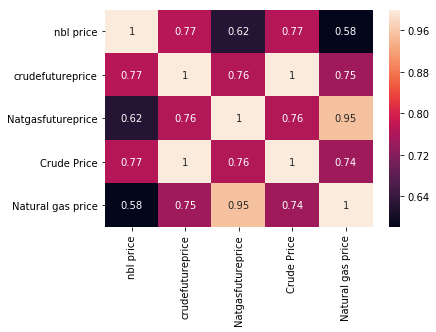

In [50]:
sns.heatmap(Finaldf.corr(),annot=True)

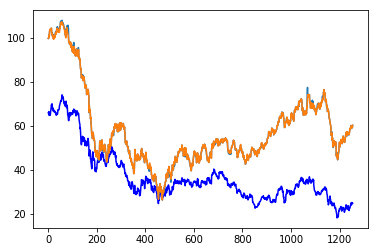

In [51]:
plt.plot(Finaldf['nbl price'],'b')
plt.plot(Finaldf['Crude Price'])
plt.plot(Finaldf['crudefutureprice'])

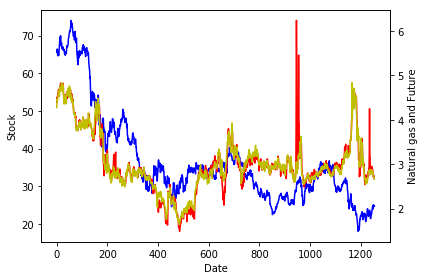

In [52]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock')
ax1.plot(Finaldf['nbl price'],'b')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Natural gas and Future')  # we already handled the x-label with ax1
ax2.plot(Finaldf['Natural gas price'],'r')
ax2.plot(Finaldf['Natgasfutureprice'],'y')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

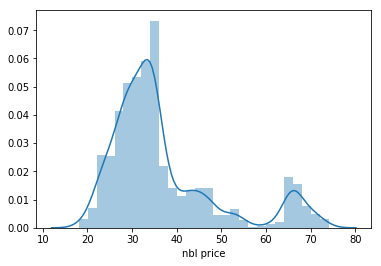

In [53]:
sns.distplot(Finaldf['nbl price'])

In [54]:
X=Finaldf[['crudefutureprice', 'Natgasfutureprice','Crude Price', 'Natural gas price']]
Y=Finaldf['nbl price']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.5)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
nlrm=LinearRegression()

In [59]:
nlrm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
print(nlrm.intercept_)

2.6147011689560458


In [61]:
nlrm.coef_

array([ 1.26270308,  6.23919554, -0.75276149, -4.68061012])

In [62]:
coeff_df=pd.DataFrame(nlrm.coef_,X.columns,columns=['Coeff'])

In [63]:
coeff_df

,Coeff
crudefutureprice,1.262703
Natgasfutureprice,6.239196
Crude Price,-0.752761
Natural gas price,-4.680610


In [64]:
predictions=nlrm.predict(X_test)

In [65]:
print(predictions.mean(),predictions.std())

36.83902080629702 9.473892558866421


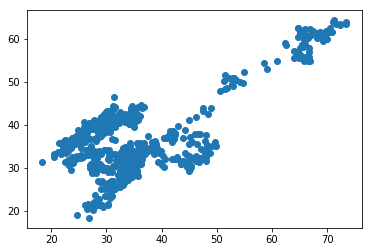

In [66]:
plt.scatter(Y_test,predictions)

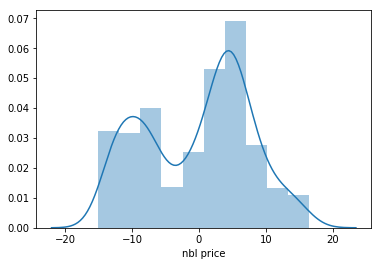

In [67]:
sns.distplot((Y_test-predictions))

In [68]:
from sklearn import metrics

In [69]:
metrics.r2_score(Y_test,predictions)

0.5915584551470918

In [70]:
print(metrics.mean_absolute_error(Y_test,predictions),metrics.mean_squared_error(Y_test,predictions),
      np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

6.8680983624192535 62.827513502484095 7.926380857773874
